In [107]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

In [34]:
# df = pd.read_csv('https://archive.ics.uci.edu/ml/'
#                  'machine-learning-databases'
#                  '/breast-cancer-wisconsin/wdbc.data',header=None)
df = pd.read_csv('wdbc.data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [35]:
X = df.loc[:,2:].values
y = df.loc[:,1].values

le = LabelEncoder()
y = le.fit_transform(y)
print(f"New classes {le.transform(le.classes_)} are equivalente to old clases {le.classes_}, respectively")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

New classes [0 1] are equivalente to old clases ['B' 'M'], respectively


In [144]:
########################### Cross validation score ####################################

# Pipeline
# chain the StandardScaler, PCA, and LogisticRegression objects in a pipeline
from sklearn.preprocessing import StandardScaler # for standarization
from sklearn.decomposition import PCA # for unsupervised feature extraction
from sklearn.linear_model import LogisticRegression # for learning and predicting
from sklearn.pipeline import make_pipeline # for making a pipeline

pipe_lr = make_pipeline(StandardScaler(), # transformer (fit->transform)
                        PCA(n_components=2), # transformer (fit->transform)
                        LogisticRegression(random_state=1,solver='lbfgs', max_iter=100000), verbose=False) # estimator (fit->predict)

# Cross validation
scores = cross_val_score(estimator=pipe_lr, # object with (.fit, .predict) methods
                         X=X_train,
                         y=y_train,
                         cv=10,             # int, to specify the number of folds in a (Stratified)KFold
                         n_jobs=1)          # parallel computing

print('CV accuracy scores: %s' % scores)

CV accuracy scores: [0.95652174 0.97826087 0.93478261 0.97826087 1.         0.97777778
 0.95555556 0.88888889 0.97777778 1.        ]


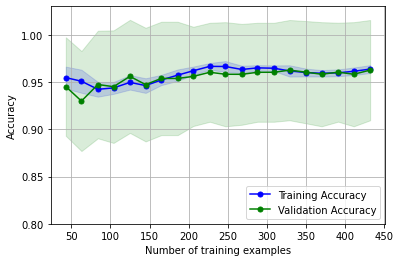

In [145]:
########################### Learning Curve ################################
# plotting the training and test accuracies as functions of the sample size

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
    learning_curve(estimator=pipe_lr,
                   X=X_train,
                   y=y_train,
                   train_sizes=np.linspace(0.1, 1.0, 20),
                   cv=20,n_jobs=2)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

for mean_score, std_score, label_, color_ in [(train_mean, train_std, "Training Accuracy", "blue"), (test_mean, test_std, "Validation Accuracy", "green")]:
    plt.plot(train_sizes, mean_score,
             color=color_, marker='o',
             markersize=5, label=label_)
    plt.fill_between(train_sizes,
                     mean_score + std_score,
                     mean_score - std_score,
                     alpha=0.15, color=color_)
    
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.show()

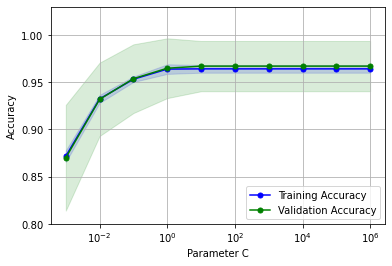

In [147]:
############################## Validation curve #################################
# plotting the training and test accuracies as functions of the model parameters

from sklearn.model_selection import validation_curve

param_range = list(np.logspace(-3,6,10))


train_scores, test_scores = \
    validation_curve(estimator=pipe_lr,
                     X=X_train,
                     y=y_train,
                     param_name='logisticregression__C',
                     param_range=param_range,
                     cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

for mean_score, std_score, label_, color_ in [(train_mean, train_std, "Training Accuracy", "blue"), (test_mean, test_std, "Validation Accuracy", "green")]:
    plt.plot(param_range, mean_score,
             color=color_, marker='o',
             markersize=5, label=label_)
    plt.fill_between(param_range,
                     mean_score + std_score,
                     mean_score - std_score,
                     alpha=0.15, color=color_)
  
    
plt.grid()
plt.xscale('log')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.show()

In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1,
               1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, # genera el objeto gs
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  refit=True,
                  n_jobs=-1)


gs.fit(X_train, y_train)  # 

print(gs.best_score_)

print(gs.best_params_)

clf = gs.best_estimator_ # internally fits the SVC of the pipe_svc of the gs
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

0.9780193236714976
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Test accuracy: 0.965


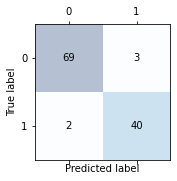

In [162]:
# Confussion Matrix
from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
# print(confmat)
# print(f"True Positive={confmat[0,0]}  | False Negative={confmat[0,1]}")
# print("------------------+------------------")
# print(f"False Positive={confmat[1,0]}  | True Negative={confmat[1,1]}")

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
                s=confmat[i, j],
                va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [173]:
# Summary of metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("")
print('Accuracy=ACC=(TP+TN)/(TP+TN+FP+FN): %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))
print("")
print('Error=ERR=(FP+FN)/(TP+TN+FP+FN): %.3f' % (1 - accuracy_score(y_true=y_test, y_pred=y_pred)))
print("")

print('Precision=PRE=TP/(TP+FP): %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print("")
print('Recall=REC=TP/(FN+TP): %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print("")
print('F1=2(PRExREC)/(PRE+REC): %.3f' % f1_score(y_true=y_test, y_pred=y_pred))



Accuracy=ACC=(TP+TN)/(TP+TN+FP+FN): 0.956

Error=ERR=(FP+FN)/(TP+TN+FP+FN): 0.044

Precision=PRE=TP/(TP+FP): 0.930

Recall=REC=TP/(FN+TP): 0.952

F1=2(PRExREC)/(PRE+REC): 0.941
